<div style="font-size: 30px">
#1

I chose this dataset because heart failure cases have increased over the past couple decades and it is important to understand where people who have heart failures are getting it from. The dataset is fairly complex some OneHotEncoding done on some of the necessary variables.

<div style="font-size: 30px">
#2

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir(r'C:\Users\galla\OneDrive\Documents\Test')

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<div style="font-size: 20px">
Explore the dataset to understand its structure, features, and distributions.

In [3]:
dataset.shape

(299, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<div style="font-size: 20px">
Handle Outliers

In [5]:
def handle_outliers_zscore(dataset, threshold=3):
    z_scores = np.abs((dataset - dataset.mean()) / dataset.std())
    outliers = (z_scores > threshold).any(axis=1)
    dataset_cleaned = dataset[~outliers]
    return dataset_cleaned

In [6]:
dataset_cleaned = handle_outliers_zscore(dataset)
dataset_cleaned

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


<div style="font-size: 30px">
#3

<div style="font-size: 20px">
Univariate Analysis of Categorical Variables

<Axes: xlabel='diabetes', ylabel='age'>

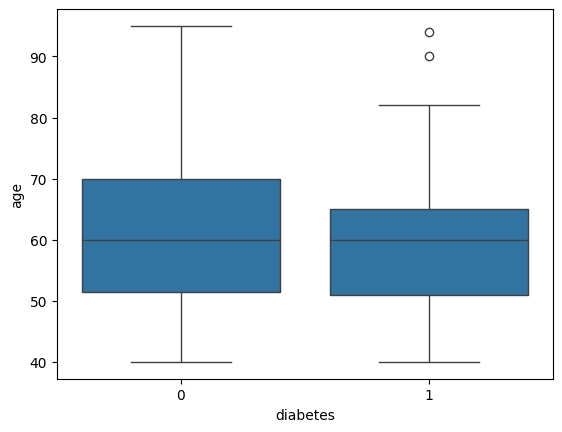

In [7]:
sns.boxplot(data = dataset_cleaned, x='diabetes', y='age')

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

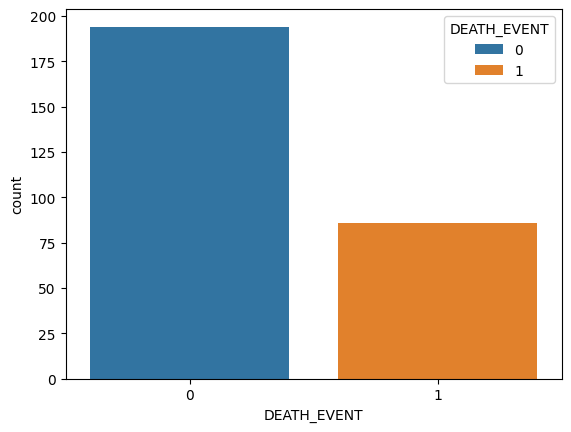

In [8]:
sns.countplot(x='DEATH_EVENT', data = dataset_cleaned, hue='DEATH_EVENT')

<Axes: xlabel='anaemia', ylabel='count'>

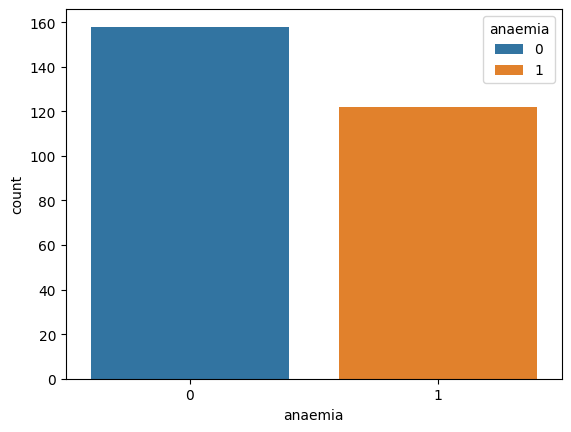

In [9]:
sns.countplot(x='anaemia', data = dataset_cleaned, hue='anaemia')

<Axes: xlabel='diabetes', ylabel='count'>

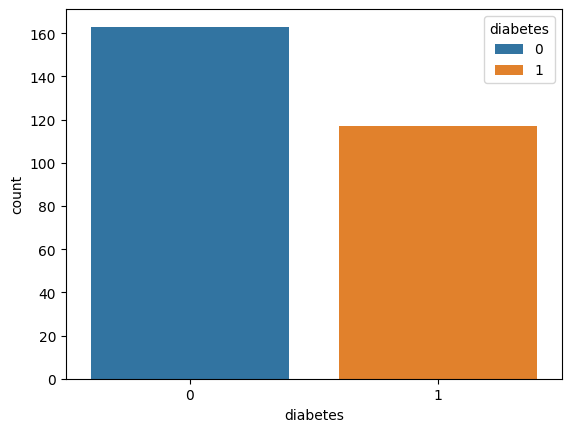

In [10]:
sns.countplot(x='diabetes', data = dataset_cleaned, hue='diabetes')

<Axes: xlabel='high_blood_pressure', ylabel='count'>

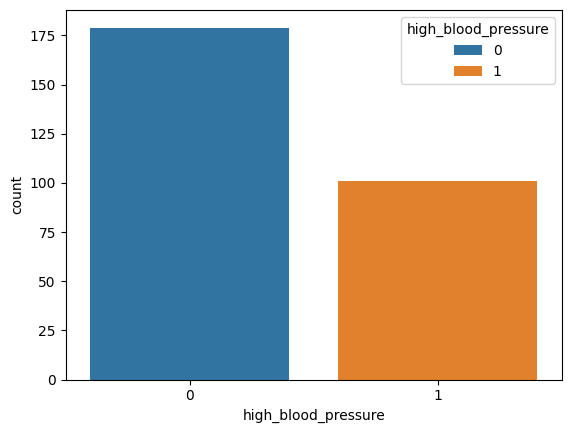

In [11]:
sns.countplot(x='high_blood_pressure', data = dataset_cleaned, hue='high_blood_pressure')

<Axes: xlabel='sex', ylabel='count'>

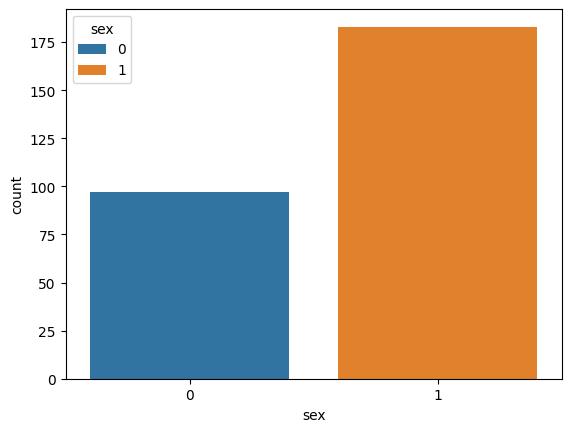

In [12]:
sns.countplot(x='sex', data = dataset_cleaned, hue='sex')

<Axes: xlabel='smoking', ylabel='count'>

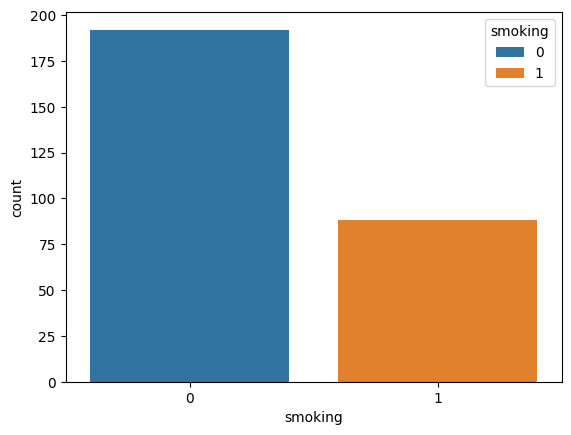

In [13]:
sns.countplot(x='smoking', data = dataset_cleaned, hue='smoking')

<div style="font-size: 20px">
Univariate Analysis of Continuous Variables

<Axes: xlabel='age', ylabel='Count'>

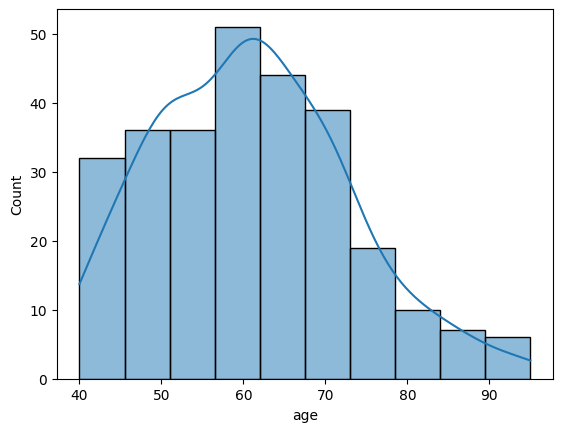

In [14]:
sns.histplot(dataset_cleaned.age,kde=True)

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

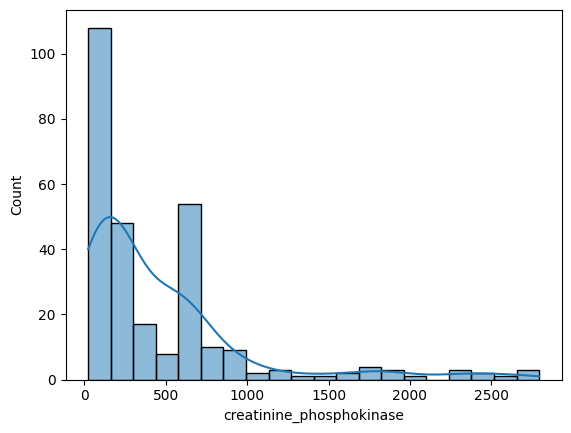

In [15]:
sns.histplot(dataset_cleaned.creatinine_phosphokinase,kde=True)

<Axes: xlabel='platelets', ylabel='Count'>

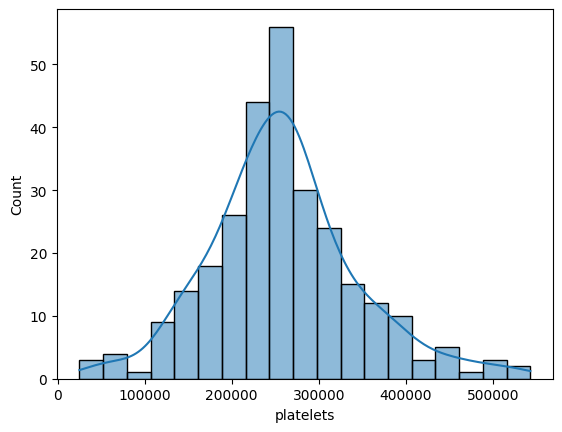

In [16]:
sns.histplot(dataset_cleaned.platelets,kde=True)

<Axes: xlabel='time', ylabel='Count'>

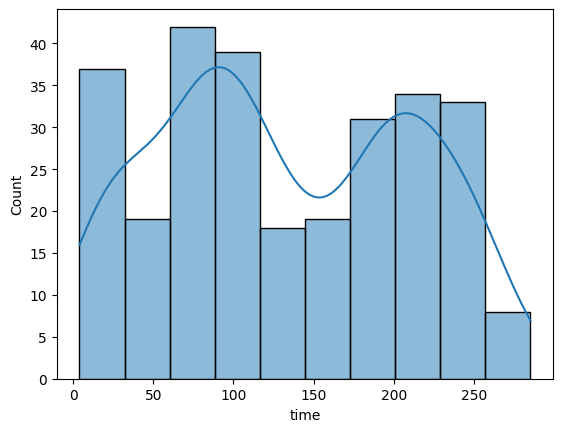

In [17]:
sns.histplot(dataset_cleaned.time,kde=True)

<Axes: xlabel='serum_creatinine', ylabel='Count'>

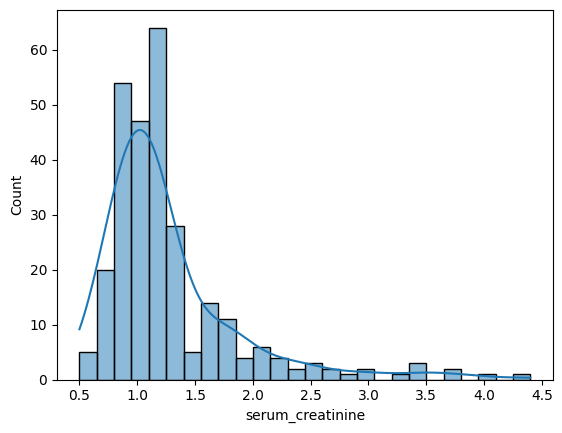

In [18]:
sns.histplot(dataset_cleaned.serum_creatinine,kde=True)

<Axes: xlabel='serum_sodium', ylabel='Count'>

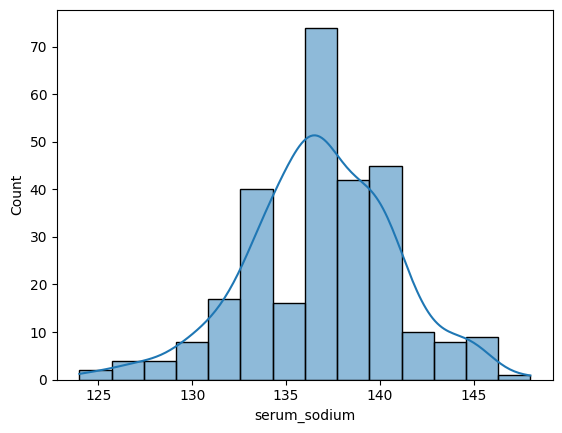

In [19]:
sns.histplot(dataset_cleaned.serum_sodium,kde=True)

<div style="font-size: 20px">
Bivariate Analysis of Continuous Variables

<Axes: xlabel='age', ylabel='Density'>

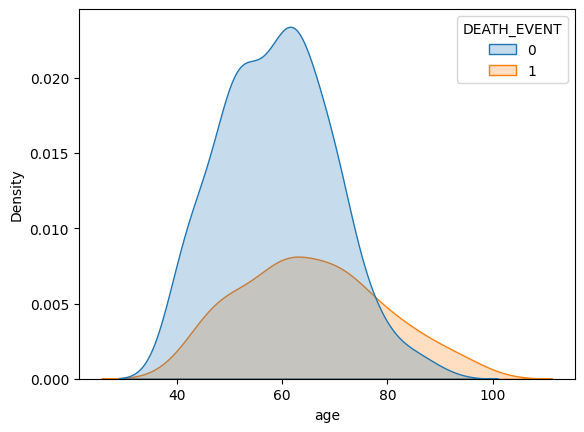

In [20]:
sns.kdeplot(x='age', hue='DEATH_EVENT', fill=True, data=dataset_cleaned)

<Axes: xlabel='serum_creatinine', ylabel='Density'>

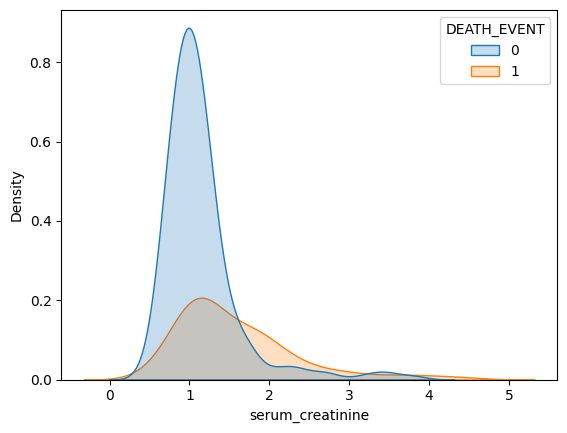

In [21]:
sns.kdeplot(x='serum_creatinine', hue='DEATH_EVENT', fill=True, data=dataset_cleaned)

<Axes: xlabel='creatinine_phosphokinase', ylabel='Density'>

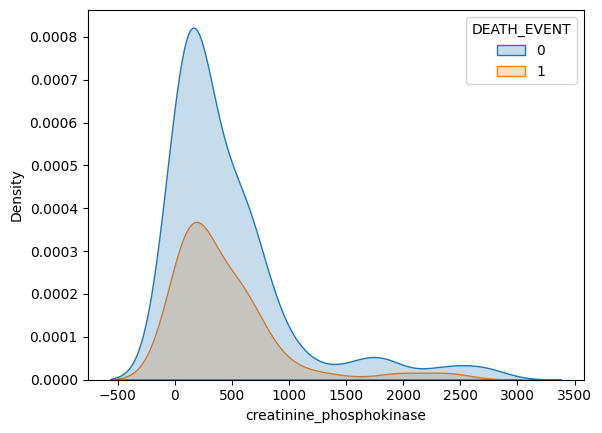

In [22]:
sns.kdeplot(x='creatinine_phosphokinase', hue='DEATH_EVENT', fill=True, data=dataset_cleaned)

<div style="font-size: 20px">
Bivariate Analysis of Categorical Variables Variables

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

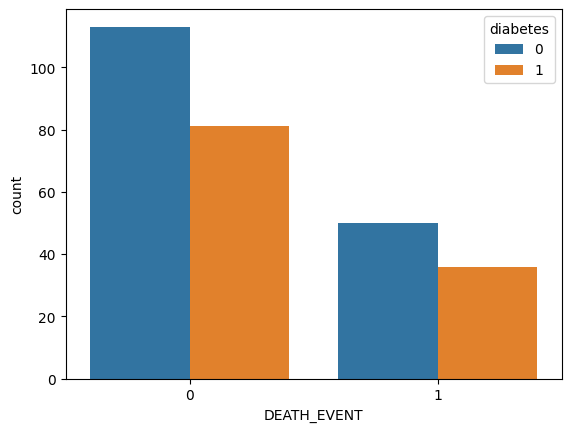

In [23]:
sns.countplot(hue='diabetes', data = dataset_cleaned, x = 'DEATH_EVENT')

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

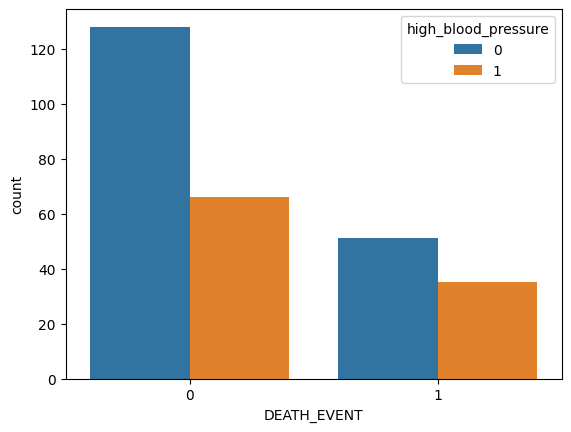

In [24]:
sns.countplot(hue='high_blood_pressure', data = dataset_cleaned, x = 'DEATH_EVENT')

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

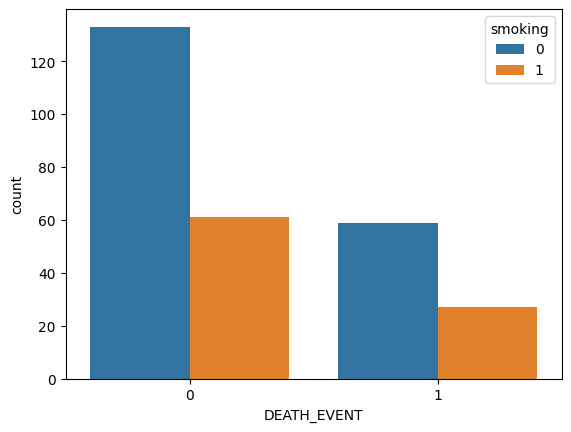

In [25]:
sns.countplot(hue='smoking', data = dataset_cleaned, x = 'DEATH_EVENT')

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

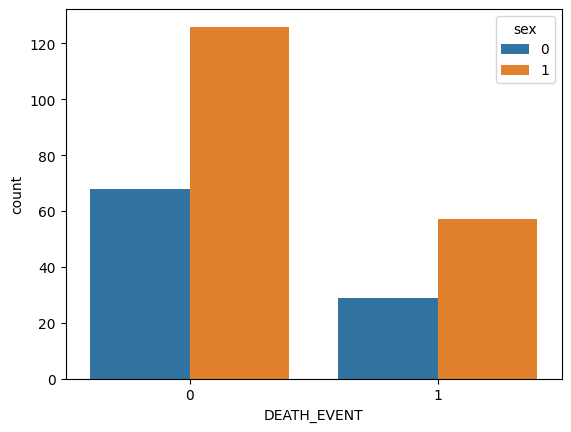

In [26]:
sns.countplot(hue='sex', data = dataset_cleaned, x = 'DEATH_EVENT')

<div style="font-size: 20px">
Multivariate Analysis

<Axes: xlabel='sex', ylabel='age'>

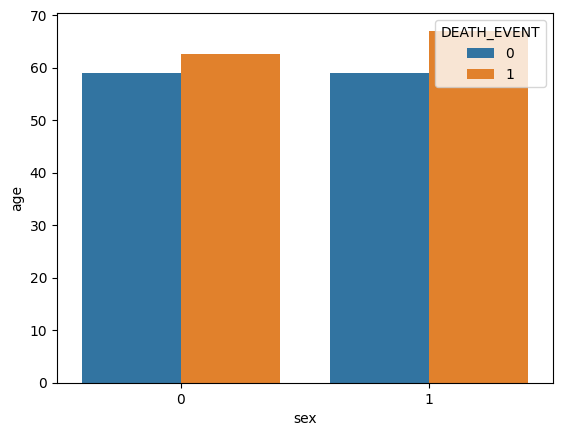

In [27]:
sns.barplot(dataset_cleaned, x="sex", y="age", hue="DEATH_EVENT", errorbar=None)

<Axes: xlabel='diabetes', ylabel='age'>

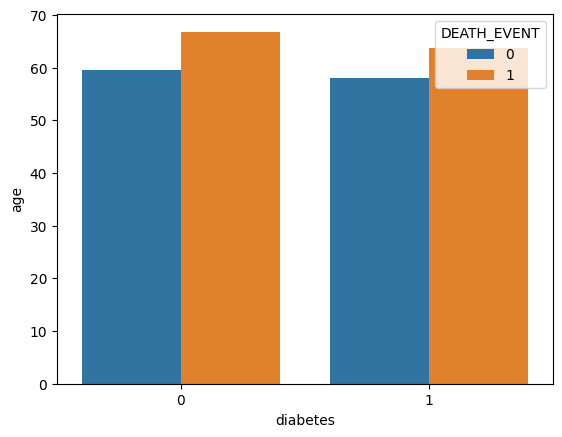

In [28]:
sns.barplot(dataset_cleaned, x="diabetes", y="age", hue="DEATH_EVENT", errorbar=None)

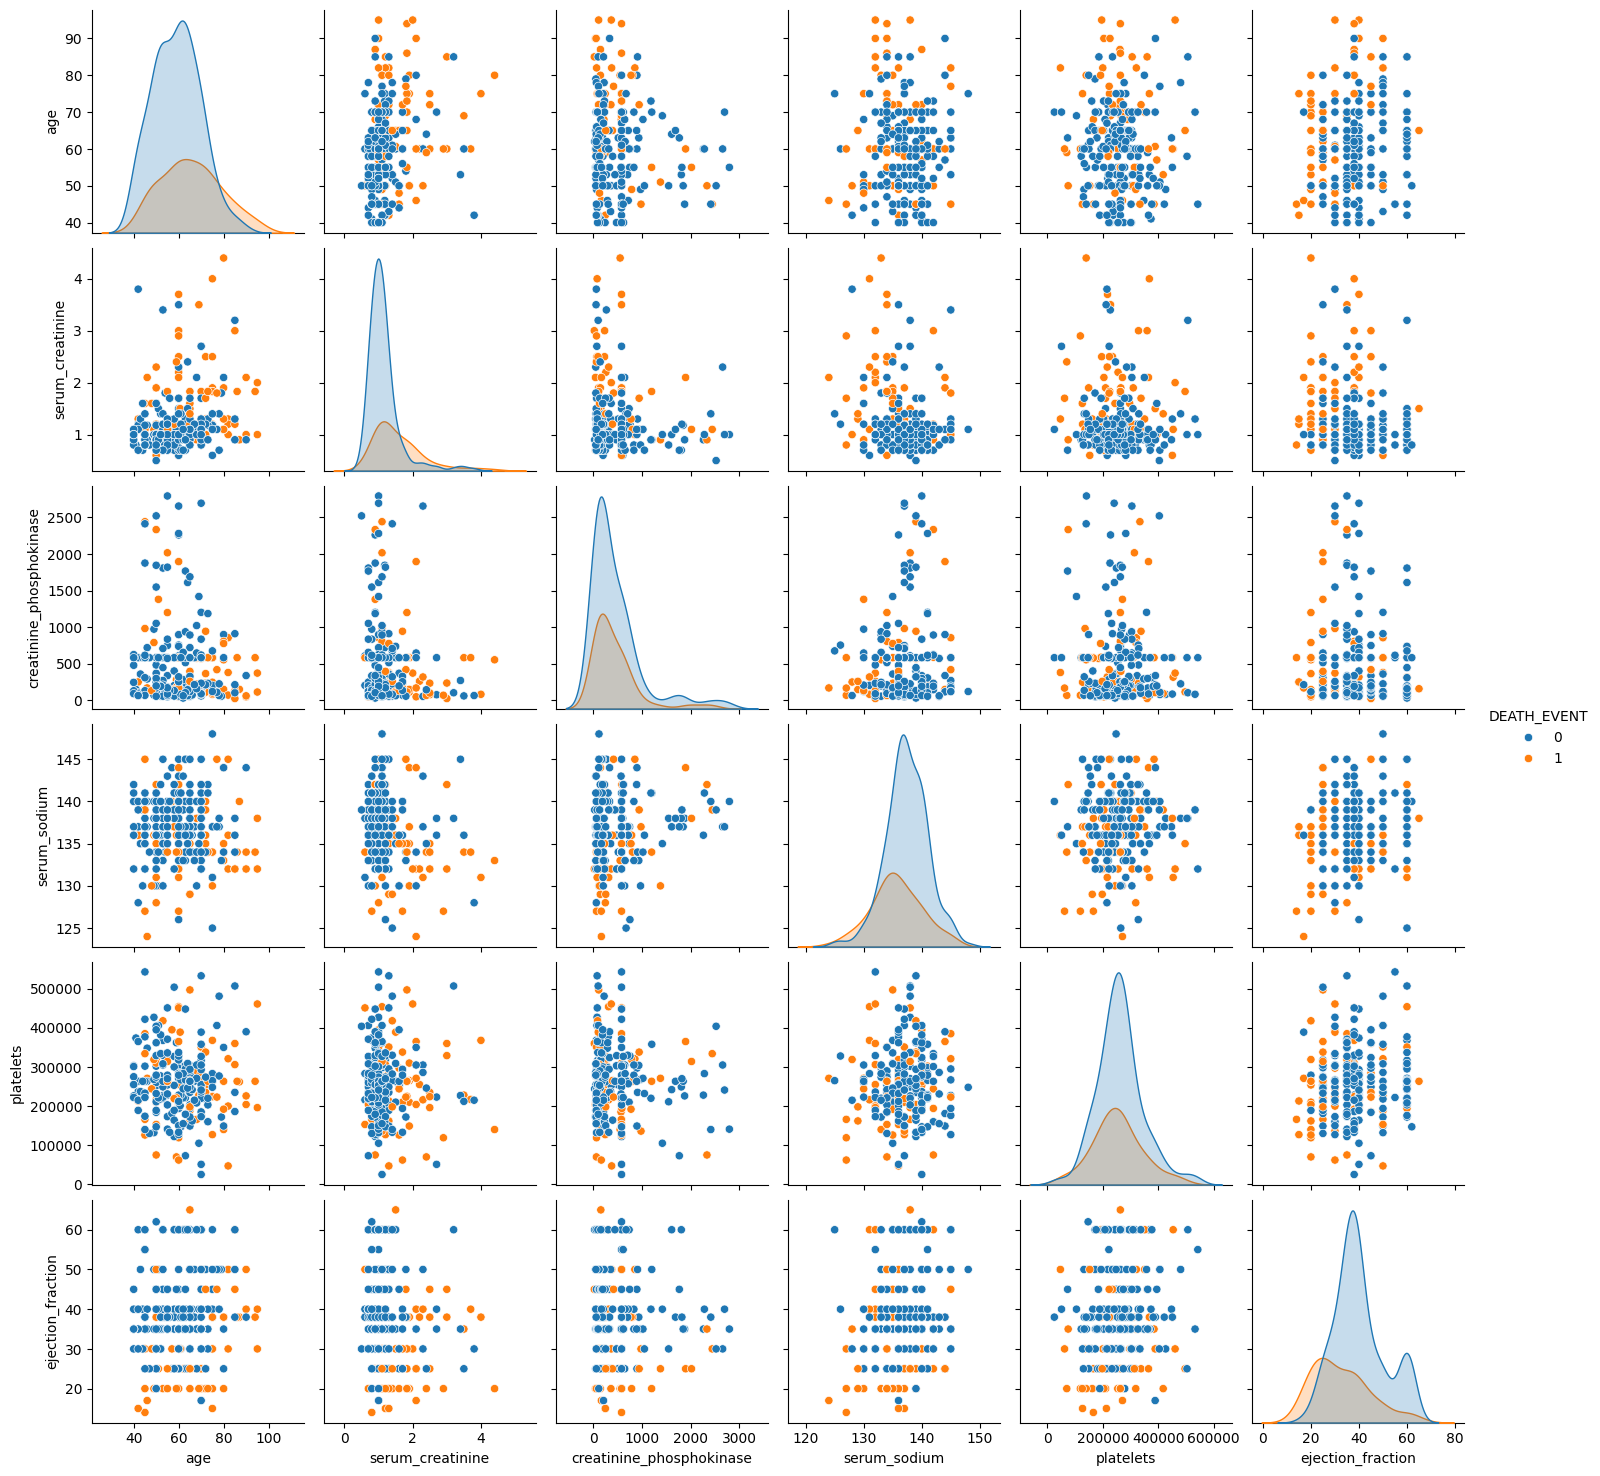

In [29]:
sns.pairplot(data=dataset_cleaned[['age', 'serum_creatinine', 'creatinine_phosphokinase', 'serum_sodium', 'platelets', 'DEATH_EVENT', 'ejection_fraction']], hue='DEATH_EVENT')

<Axes: >

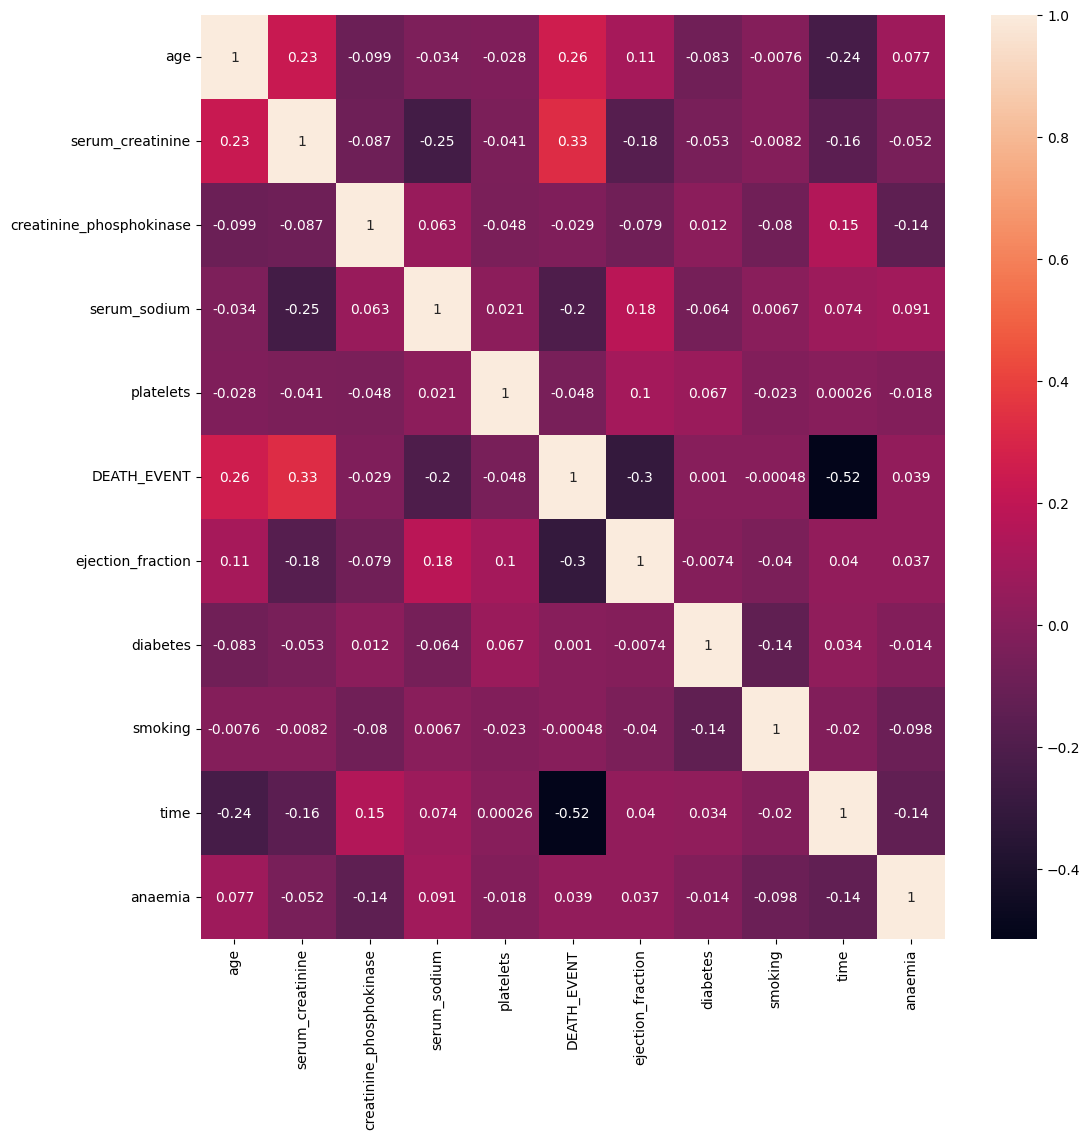

In [30]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=dataset_cleaned[['age', 'serum_creatinine', 'creatinine_phosphokinase', 'serum_sodium', 'platelets', 'DEATH_EVENT', 'ejection_fraction', 'diabetes', 'smoking', 'time', 'anaemia']].corr(), annot = True)

From the above heatmap we can see that the only relevant details that are correlated with DEATH_EVENT are age, serum_creatinine, serum_sodium, ejection_fraction, and time.

<div style="font-size: 30px">
#4

Create new dataset containing the relevant details from the above heatmap:

In [31]:
new_dataset = dataset_cleaned[['age', 'serum_creatinine', 'serum_sodium', 'ejection_fraction', 'time', 'DEATH_EVENT']]
new_dataset

,age,serum_creatinine,serum_sodium,ejection_fraction,time,DEATH_EVENT
0,75.0,1.9,130,20,4,1
2,65.0,1.3,129,20,7,1
3,50.0,1.9,137,20,7,1
5,90.0,2.1,132,40,8,1
6,75.0,1.2,137,15,10,1
...,...,...,...,...,...,...
293,63.0,0.9,136,35,270,0
294,62.0,1.1,143,38,270,0
295,55.0,1.2,139,38,271,0
297,45.0,1.4,140,38,280,0


In [32]:
X = new_dataset.iloc[:, :-1].values
y = new_dataset.iloc[:, -1].values

<div style="font-size: 20px">
Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.18934352,  1.01621284, -1.74232053, -1.55770976, -1.6703928 ],
       [ 0.34147055,  0.04003492, -1.99760559, -1.55770976, -1.63145482],
       [-0.93033892,  1.01621284,  0.04467489, -1.55770976, -1.63145482],
       ...,
       [-0.50640243, -0.12266141,  0.555245  ,  0.01434815,  1.79508703],
       [-1.35427541,  0.20273124,  0.81053006,  0.01434815,  1.91190096],
       [-0.93033892,  0.52812388, -0.21061017,  0.625704  ,  1.97679758]])

<div style="font-size: 30px">
#5

<div style="font-size: 20px">
Split Data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

<div style="font-size: 20px">
Train Model

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


<div style="font-size: 20px">
Evaluate Performance

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[37  2]
 [ 5 12]]


0.875

From the above metrics we can see the confusion matrix contains 2 false positives and 5 false negatives. Although 5 false negatives doesn't seem too high, I would like the value to be less because having many false negatives when using medical data can be extremely bad and could cause tons of problems. The accuracy score of .875 shows the model has good accuracy

<div style="font-size: 30px">
#6

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
y_predict = regressor.predict(X_test)
y_predict

array([-0.02351069,  0.63560106,  0.31954091,  0.38219933, -0.15295586,
       -0.02545112,  0.74606166,  0.15684017,  0.37419614,  0.00699176,
       -0.02344314,  0.46270906,  0.32552311,  0.62135254,  0.74700823,
        0.04545257,  0.59288446,  0.15069148,  0.72684184,  0.12362639,
       -0.06255037,  0.1973011 ,  0.25424819,  0.42379245,  0.1974144 ,
        0.06307324,  0.14775605, -0.07326281,  0.13734423,  0.70625196,
        0.44223494,  0.19112894,  0.51855565,  0.27302147,  1.05303513,
        0.54573591,  0.04382922,  0.33457024,  0.17222016,  0.42740901,
        0.40385133, -0.20026354, -0.05781911,  0.60521542,  0.67483885,
       -0.21335429, -0.180104  ,  0.19552085,  0.24574616,  0.00675571,
        0.83868785,  0.67771435,  0.03570621,  0.27593352,  0.44604502,
        0.29356272])

In [40]:
from sklearn.metrics import r2_score
print( "R2 Score", r2_score(y_test,y_predict))

R2 Score 0.45283965212954247


The R2 score indicates that a linear regression model is not better than the logistic regression model because the R2 score for the linear regression model is below .5 which is not good and the accuracy score for the logistic regression model is .875 which is a good score. Therefore, the logistic regression is the appropriate model for this data.

<div style="font-size: 30px">
#7

<div style="font-size: 20px">
Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 46)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=46)

In [42]:
from sklearn.metrics import classification_report 
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm


array([[37,  2],
       [ 4, 13]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       0.87      0.76      0.81        17

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56



When using the Random Tree model, we were able to reduce the number of false negatives from 5 to 4 from logistic regression model. I was able to reduce the false negative count by increasing the number of estimators used during the random tree model training process. From the classification report, the accuracy also increased from .875 to .89 which means this model is slightly more accurate than the logistic regression model. Also from the classification report we can see the precision, recall, and f1-score are all .90 or above which indicates a much more accurate and trustworthy model.

In [44]:
y_pred_rf = classifier_rf.predict([[-0.93033892,  0.52812388, -0.21061017,  0.625704  ,  1.97679758]])
y_pred_rf

array([0], dtype=int64)

In [47]:
import autosklearn.classification

cls = autosklearn.classification.AutoSklearnClassifier()

cls.fit(X_train, y_train)

predictions = cls.predict(X_test)

ModuleNotFoundError: No module named 'autosklearn'